In [1]:
# Importa as bibliotecas necessarias
%pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

# Definindo as variaveis

peso
- leve
- medio
- pesado

comer
- pouco
- razoavel
- bastante

tempoAF

- pouco
- moderado
- muito

obesidade
- leve
- normal
- pesado
- obeso

In [2]:
# Definindo as variaveis

# Variaveis de Entrada (Antecedent)
peso = ctrl.Antecedent(np.arange(0, 11, 1), 'peso')
comer = ctrl.Antecedent(np.arange(0, 11, 1), 'comer')
tempoAF = ctrl.Antecedent(np.arange(0, 11, 1), 'tempoAF')

# Variaveis de saide (Consequent)
obesidade = ctrl.Consequent(np.arange(0, 31, 1), 'obesidade')

In [3]:
# automf -> Atribuicao de categorias automaticamente
peso.automf(names=['leve', 'medio', 'pesado'])
comer.automf(names=['pouco', 'razoavel', 'bastante'])
tempoAF.automf(names=['pouco', 'moderado', 'muito'])
# peso.view()

# Funcoes de pertinencia

## Triangular

c:\Users\AlvaroCJesus\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


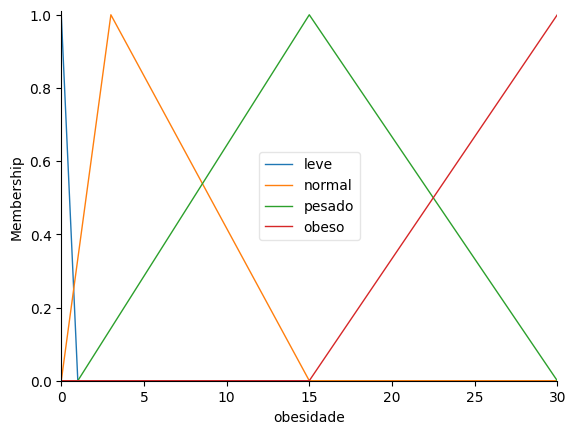

In [4]:
obesidade['leve'] = fuzz.trimf(obesidade.universe, [-1, 0, 1])
obesidade['normal'] = fuzz.trimf(obesidade.universe, [0, 3, 15])
obesidade['pesado'] = fuzz.trimf(obesidade.universe, [1, 15, 30])
obesidade['obeso'] = fuzz.trimf(obesidade.universe, [15, 30, 45])
obesidade.view()

## Gaussiana

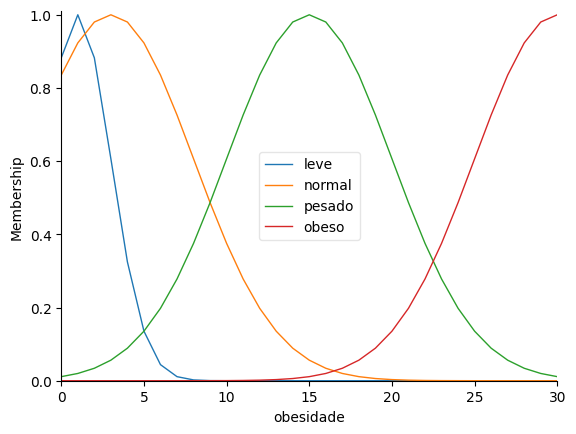

In [5]:
obesidade['leve'] = fuzz.gaussmf(obesidade.universe, 1, 2)
obesidade['normal'] = fuzz.gaussmf(obesidade.universe, 3, 5)
obesidade['pesado'] = fuzz.gaussmf(obesidade.universe, 15, 5)
obesidade['obeso'] = fuzz.gaussmf(obesidade.universe, 30, 5)
obesidade.view()

## Trapezoidal

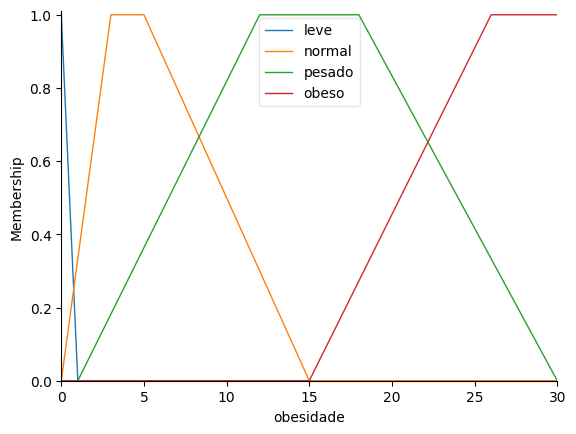

In [6]:
obesidade['leve'] = fuzz.trapmf(obesidade.universe, [-1, 0, 0, 1])
obesidade['normal'] = fuzz.trapmf(obesidade.universe, [0, 3, 5, 15])
obesidade['pesado'] = fuzz.trapmf(obesidade.universe, [1, 12, 18, 30])
obesidade['obeso'] = fuzz.trapmf(obesidade.universe, [15, 26, 30, 45])
obesidade.view()

# Regras

## Criando as regras

In [8]:
# Criando as regras
regra_1 = ctrl.Rule(comer['bastante'] & peso['pesado'], obesidade['obeso'])
regra_2 = ctrl.Rule(comer['razoavel'] & peso['medio'], obesidade['normal'])
regra_3 = ctrl.Rule(comer['pouco'] & peso['leve'], obesidade['leve'])
regra_4 = ctrl.Rule(comer['bastante'] & peso['leve'], obesidade['normal'])
regra_5 = ctrl.Rule(comer['bastante'] & peso['leve'] & tempoAF['muito'], obesidade['normal'])
regra_6 = ctrl.Rule(comer['bastante'] & peso['pesado'] & tempoAF['moderado'], obesidade['normal'])
regra_7 = ctrl.Rule(comer['pouco'] & peso['leve'] & tempoAF['muito'], obesidade['leve'])

controlador = ctrl.ControlSystem([regra_1, regra_2, regra_3, regra_4, regra_5, regra_6, regra_7])

# Controlador

## Executando controlador

12.662704565030142


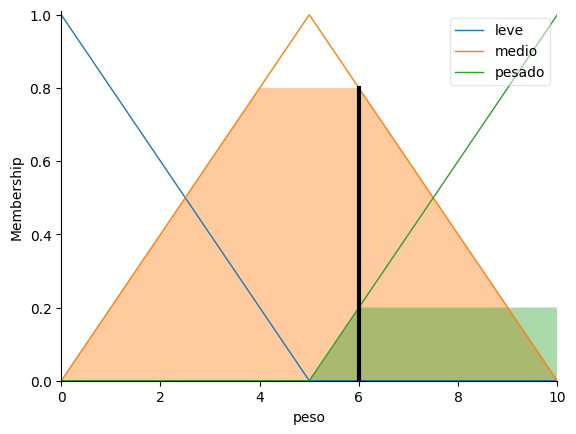

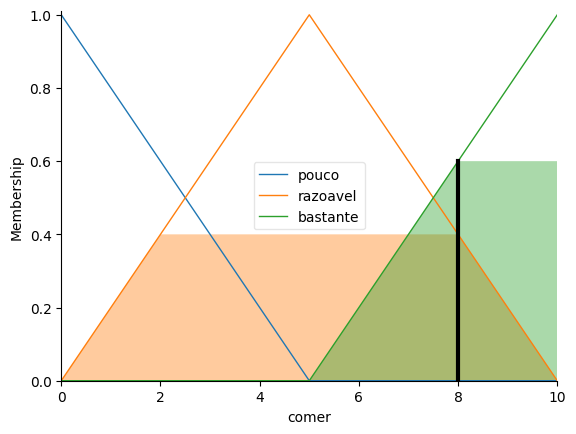

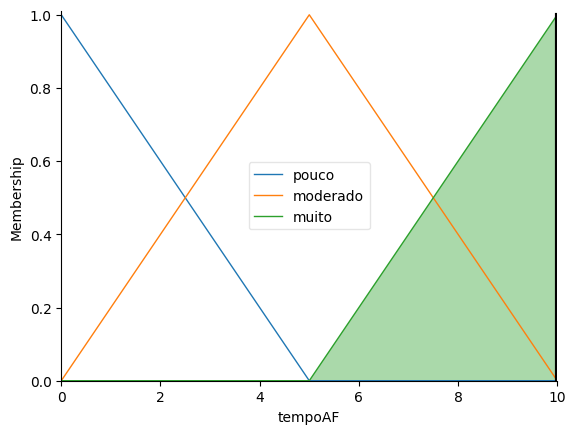

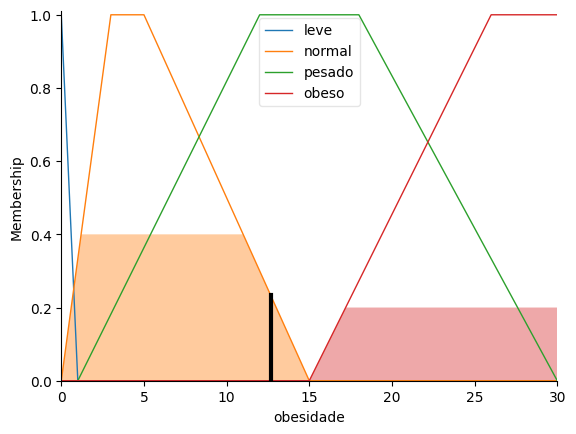

In [10]:
#Simulando
CalculoObesidade = ctrl.ControlSystemSimulation(controlador)

# peso = int(input('Peso: '))
# servico = int(input('Comer: '))
CalculoObesidade.input ['peso'] = 6
CalculoObesidade.input ['comer'] = 8
CalculoObesidade.input ['tempoAF'] = 10
# CalculoObesidade.input ['peso'] = peso
# CalculoObesidade.input ['comer'] = servico

# Crunch the numbers
CalculoObesidade.compute()

print(CalculoObesidade.output['obesidade'])
peso.view(sim=CalculoObesidade)
comer.view(sim=CalculoObesidade)
tempoAF.view(sim=CalculoObesidade)
obesidade.view(sim=CalculoObesidade)

plt.show()